# Introdução a séries temporais - Parte 09

## Aplicando modelos na bolsa de valores



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web

final = np.datetime64('today')
inicio = final - np.timedelta64(90, 'D')
df = web.DataReader('GOOG', 'yahoo', inicio, final)[['Close']]
df.tail()

,Close
Date,
2020-05-05,1351.109985
2020-05-06,1347.300049
2020-05-07,1372.560059
2020-05-08,1388.369995
2020-05-11,1405.099976


In [0]:
from sklearn.tree import DecisionTreeRegressor

p = 2
max_depth = 3

df1 = df[['Close']].copy()
for i in range(p):
    df1[f'x_{i+1}'] = df1.Close.shift(i + 1)
df1.dropna(axis=0, inplace=True)

X = df1.drop('Close', axis=1)
y = df1.Close
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

1522.6760711546126

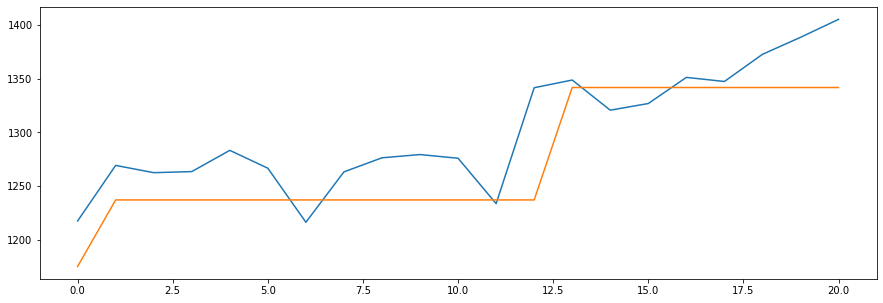

In [0]:
plt.figure(figsize=(15 ,5))
plt.plot(y_test.values)
plt.plot(reg.predict(X_test))

In [0]:
from statsmodels.tsa.arima_model import ARIMA 

model = ARIMA(df.Close, order=(3, 1, 3)).fit()

(model.resid ** 2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1489.3109534041164

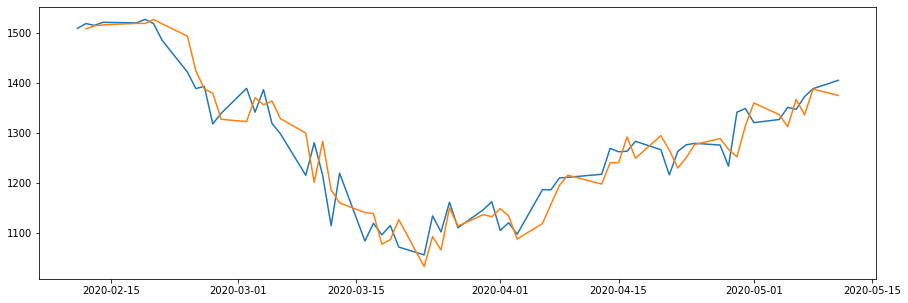

In [0]:
plt.figure(figsize=(15 ,5))
plt.plot(df.Close)
plt.plot(model.predict(typ='levels'))

In [0]:
model.forecast()[0]

array([1423.5419285])